# IDE Setup

In [0]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm() 


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from google.colab import files
uploaded = files.upload()

-----

# Original Dataset

## Load Dataset

In [0]:
from scipy.io import arff
import pandas as pd
from sklearn.model_selection import train_test_split

# load dataset
dataset, metadata = arff.loadarff('/content/drive/My Drive/Colab Notebooks/KDDTrain+.arff')
tr = pd.DataFrame(dataset)

dataset, metadata = arff.loadarff('/content/drive/My Drive/Colab Notebooks/KDDTest+.arff')
te = pd.DataFrame(dataset)

# redefine train and test set
merged = pd.concat([te, tr], ignore_index=True)
tr, te = train_test_split(merged, test_size=0.2)

# merge sets
tr['train'] = 1
te['train'] = 0
original_df = pd.concat([te, tr])

original_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,train
48876,3.0,b'udp',b'private',b'SF',105.0,146.0,b'0',0.0,0.0,0.0,0.0,b'0',0.0,b'0',b'0',0.0,0.0,0.0,0.0,0.0,b'0',b'0',2.0,2.0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255.0,247.0,0.97,0.01,0.02,0.00,0.00,0.0,0.00,0.00,b'normal',0
9500,0.0,b'tcp',b'imap4',b'RSTO',0.0,44.0,b'0',0.0,0.0,0.0,0.0,b'0',0.0,b'0',b'0',0.0,0.0,0.0,0.0,0.0,b'0',b'0',2.0,1.0,0.0,0.0,1.0,1.0,0.50,1.00,0.00,255.0,49.0,0.19,0.03,0.00,0.00,0.00,0.0,0.70,0.98,b'anomaly',0
29486,0.0,b'tcp',b'http',b'S0',0.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',0.0,b'0',b'0',0.0,0.0,0.0,0.0,0.0,b'0',b'0',245.0,21.0,1.0,1.0,0.0,0.0,0.09,0.05,0.00,255.0,21.0,0.08,0.06,0.00,0.00,1.00,1.0,0.00,0.00,b'anomaly',0
73126,0.0,b'icmp',b'urp_i',b'SF',182.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',0.0,b'0',b'0',0.0,0.0,0.0,0.0,0.0,b'0',b'0',2.0,1.0,0.0,0.0,0.0,0.0,0.50,1.00,0.00,255.0,23.0,0.09,0.01,0.11,0.00,0.00,0.0,0.00,0.00,b'normal',0
35920,0.0,b'tcp',b'http',b'SF',291.0,6895.0,b'0',0.0,0.0,0.0,0.0,b'1',0.0,b'0',b'0',0.0,0.0,0.0,0.0,0.0,b'0',b'0',4.0,4.0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,4.0,255.0,1.00,0.00,0.25,0.01,0.00,0.0,0.00,0.00,b'normal',0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128747,0.0,b'tcp',b'private',b'OTH',0.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',0.0,b'0',b'0',0.0,0.0,0.0,0.0,0.0,b'0',b'0',1.0,1.0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,168.0,1.0,0.01,0.71,0.71,0.00,0.04,0.0,0.62,0.00,b'anomaly',1
130050,18.0,b'tcp',b'smtp',b'SF',834.0,328.0,b'0',0.0,0.0,0.0,0.0,b'1',0.0,b'0',b'0',0.0,0.0,0.0,0.0,0.0,b'0',b'0',1.0,2.0,0.0,0.0,0.0,0.0,1.00,0.00,1.00,100.0,45.0,0.45,0.03,0.01,0.00,0.00,0.0,0.00,0.00,b'normal',1
107990,0.0,b'tcp',b'private',b'S0',0.0,0.0,b'0',0.0,0.0,0.0,0.0,b'0',0.0,b'0',b'0',0.0,0.0,0.0,0.0,0.0,b'0',b'0',135.0,15.0,1.0,1.0,0.0,0.0,0.11,0.07,0.00,255.0,35.0,0.14,0.05,0.00,0.00,1.00,1.0,0.00,0.00,b'anomaly',1
72191,0.0,b'tcp',b'http',b'SF',265.0,3608.0,b'0',0.0,0.0,0.0,0.0,b'1',0.0,b'0',b'0',0.0,0.0,0.0,0.0,0.0,b'0',b'0',5.0,5.0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,11.0,255.0,1.00,0.00,0.09,0.04,0.00,0.0,0.00,0.00,b'normal',1


### Latex Formatting

In [0]:
import numpy as np

from scipy.ndimage.interpolation import shift

cols = original_df.drop('train', axis=1).columns
colcpy= ['nothing']

for c in cols:
  colcpy.append(c)

cols = np.array(colcpy)

l = [8, 9]
l.extend(range(23,42))

coldict = {
      "categorical": cols[[2, 3, 4, 42]],
      "binary": cols[[7, 12, 14, 20, 21, 22]],
      "discrete": cols[l],
      "continuous": cols[[1, 5, 6, 10, 11, 13, 16, 17, 18, 19]]
}

In [0]:
dff = []

for c in coldict["continuous"]:
  dff.append([c, len(original_df[c].loc[(original_df[c]%1)!=0]) > 0])

for c in coldict["discrete"]:
  dff.append([c, len(original_df[c].loc[(original_df[c]%1)!=0]) > 0])

pd.DataFrame(dff).sort_values(by=1)

,0,1
0,duration,False
13,srv_count,False
12,count,False
11,urgent,False
22,dst_host_srv_count,False
9,num_access_files,False
8,num_shells,False
10,wrong_fragment,False
6,num_root,False
5,num_compromised,False


In [0]:
# printing result 
for c in coldict["continuous"]:
  print( str(c) + '\t & %.2f \t & %.2f' % (original_df[c].mean(), original_df[c].std()) + '\t \\\\ \\hline')

duration	 & 276.78 	 & 2460.68	 \\ \hline
src_bytes	 & 40227.95 	 & 5409611.60	 \\ \hline
dst_bytes	 & 17088.85 	 & 3703524.78	 \\ \hline
hot	 & 0.19 	 & 2.01	 \\ \hline
num_failed_logins	 & 0.00 	 & 0.07	 \\ \hline
num_compromised	 & 0.26 	 & 22.23	 \\ \hline
num_root	 & 0.27 	 & 22.69	 \\ \hline
num_file_creations	 & 0.01 	 & 0.52	 \\ \hline
num_shells	 & 0.00 	 & 0.03	 \\ \hline
num_access_files	 & 0.00 	 & 0.10	 \\ \hline


## Clean Dataset

In [0]:
# use utf8 for strings
for c in original_df.select_dtypes(include='object'):
  original_df[c] = original_df[c].str.decode('utf-8')

In [0]:
# replace all http_XXX service strings with simply http
original_df = original_df.replace('http_8001', 'http', regex=False)
original_df = original_df.replace('http_2784', 'http', regex=False)
original_df = original_df.replace('http_443', 'http', regex=False)

original_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,train
48876,3.0,udp,private,SF,105.0,146.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,2.0,2.0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255.0,247.0,0.97,0.01,0.02,0.00,0.00,0.0,0.00,0.00,normal,0
9500,0.0,tcp,imap4,RSTO,0.0,44.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,2.0,1.0,0.0,0.0,1.0,1.0,0.50,1.00,0.00,255.0,49.0,0.19,0.03,0.00,0.00,0.00,0.0,0.70,0.98,anomaly,0
29486,0.0,tcp,http,S0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,245.0,21.0,1.0,1.0,0.0,0.0,0.09,0.05,0.00,255.0,21.0,0.08,0.06,0.00,0.00,1.00,1.0,0.00,0.00,anomaly,0
73126,0.0,icmp,urp_i,SF,182.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,2.0,1.0,0.0,0.0,0.0,0.0,0.50,1.00,0.00,255.0,23.0,0.09,0.01,0.11,0.00,0.00,0.0,0.00,0.00,normal,0
35920,0.0,tcp,http,SF,291.0,6895.0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,4.0,4.0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,4.0,255.0,1.00,0.00,0.25,0.01,0.00,0.0,0.00,0.00,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128747,0.0,tcp,private,OTH,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,1.0,1.0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,168.0,1.0,0.01,0.71,0.71,0.00,0.04,0.0,0.62,0.00,anomaly,1
130050,18.0,tcp,smtp,SF,834.0,328.0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,1.0,2.0,0.0,0.0,0.0,0.0,1.00,0.00,1.00,100.0,45.0,0.45,0.03,0.01,0.00,0.00,0.0,0.00,0.00,normal,1
107990,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,135.0,15.0,1.0,1.0,0.0,0.0,0.11,0.07,0.00,255.0,35.0,0.14,0.05,0.00,0.00,1.00,1.0,0.00,0.00,anomaly,1
72191,0.0,tcp,http,SF,265.0,3608.0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,5.0,5.0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,11.0,255.0,1.00,0.00,0.09,0.04,0.00,0.0,0.00,0.00,normal,1


## Analysis

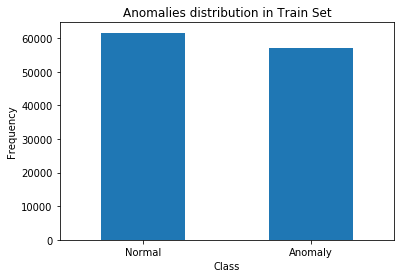

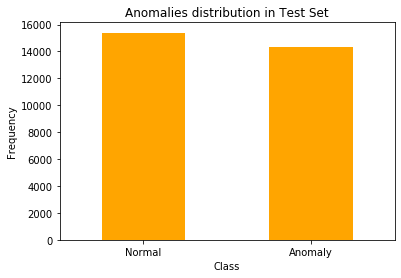

In [0]:
import matplotlib.pyplot as plt

LABELS = ["Normal", "Anomaly"]

traindf = original_df.loc[original_df['train'] == 1]
testdf = original_df.loc[original_df['train'] == 0]


count_classes = pd.value_counts(traindf['class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)

plt.title("Anomalies distribution in Train Set")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

plt.show()

count_classes = pd.value_counts(testdf['class'], sort = True)
count_classes.plot(kind = 'bar', rot=0, color='orange')

plt.title("Anomalies distribution in Test Set")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");
plt.show()

## Train/Test split

In [0]:
from sklearn.model_selection import train_test_split

#train, test = train_test_split(original_df, test_size=0.2)
train = traindf.drop('train',axis=1)
test = testdf.drop('train',axis=1)

train.to_pickle('/content/drive/My Drive/Colab Notebooks/train.pkl')
test.to_pickle('/content/drive/My Drive/Colab Notebooks/test.pkl')

del original_df
del train
del test
del tr
del te

# Dataset Analysis

## Load Train/Test

In [0]:
import pandas as pd

# load dataset
train = pd.read_pickle('/content/drive/My Drive/Colab Notebooks/train.pkl')
test  = pd.read_pickle('/content/drive/My Drive/Colab Notebooks/test.pkl')

In [0]:
train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
41282,0.0,icmp,ecr_i,SF,1032.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,208.0,208.0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255.0,208.0,0.82,0.01,0.82,0.00,0.00,0.0,0.00,0.0,anomaly
117612,0.0,tcp,http,SF,210.0,574.0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,14.0,14.0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,normal
116052,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,137.0,11.0,1.0,1.0,0.0,0.0,0.08,0.06,0.00,255.0,6.0,0.02,0.08,0.00,0.00,1.00,1.0,0.00,0.0,anomaly
32840,0.0,tcp,gopher,S0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,254.0,2.0,1.0,1.0,0.0,0.0,0.01,0.06,0.00,255.0,19.0,0.07,0.08,0.00,0.00,1.00,1.0,0.00,0.0,anomaly
45594,0.0,tcp,http,SF,286.0,20424.0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,1.0,3.0,0.0,0.0,0.0,0.0,1.00,0.00,0.67,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128747,0.0,tcp,private,OTH,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,1.0,1.0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,168.0,1.0,0.01,0.71,0.71,0.00,0.04,0.0,0.62,0.0,anomaly
130050,18.0,tcp,smtp,SF,834.0,328.0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,1.0,2.0,0.0,0.0,0.0,0.0,1.00,0.00,1.00,100.0,45.0,0.45,0.03,0.01,0.00,0.00,0.0,0.00,0.0,normal
107990,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,135.0,15.0,1.0,1.0,0.0,0.0,0.11,0.07,0.00,255.0,35.0,0.14,0.05,0.00,0.00,1.00,1.0,0.00,0.0,anomaly
72191,0.0,tcp,http,SF,265.0,3608.0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,5.0,5.0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,11.0,255.0,1.00,0.00,0.09,0.04,0.00,0.0,0.00,0.0,normal


In [0]:
test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
48876,3.0,udp,private,SF,105.0,146.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,2.0,2.0,0.00,0.0,0.00,0.0,1.00,0.00,0.0,255.0,247.0,0.97,0.01,0.02,0.00,0.00,0.00,0.00,0.00,normal
9500,0.0,tcp,imap4,RSTO,0.0,44.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,2.0,1.0,0.00,0.0,1.00,1.0,0.50,1.00,0.0,255.0,49.0,0.19,0.03,0.00,0.00,0.00,0.00,0.70,0.98,anomaly
29486,0.0,tcp,http,S0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,245.0,21.0,1.00,1.0,0.00,0.0,0.09,0.05,0.0,255.0,21.0,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
73126,0.0,icmp,urp_i,SF,182.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,2.0,1.0,0.00,0.0,0.00,0.0,0.50,1.00,0.0,255.0,23.0,0.09,0.01,0.11,0.00,0.00,0.00,0.00,0.00,normal
35920,0.0,tcp,http,SF,291.0,6895.0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,4.0,4.0,0.00,0.0,0.00,0.0,1.00,0.00,0.0,4.0,255.0,1.00,0.00,0.25,0.01,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33152,5.0,tcp,smtp,SF,911.0,357.0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,2.0,1.0,0.00,0.0,0.00,0.0,0.50,1.00,0.0,90.0,51.0,0.57,0.06,0.01,0.00,0.00,0.00,0.00,0.00,normal
40655,0.0,tcp,http,SF,242.0,11675.0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,1.0,1.0,0.00,0.0,0.00,0.0,1.00,0.00,0.0,44.0,255.0,1.00,0.00,0.02,0.02,0.02,0.00,0.00,0.00,normal
12528,0.0,tcp,other,REJ,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,458.0,1.0,0.13,0.0,0.87,1.0,0.00,1.00,0.0,255.0,1.0,0.00,0.91,0.00,0.00,0.11,0.00,0.89,1.00,anomaly
119976,0.0,tcp,http,SF,217.0,424.0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,7.0,7.0,0.00,0.0,0.00,0.0,1.00,0.00,0.0,26.0,255.0,1.00,0.00,0.04,0.05,0.00,0.00,0.00,0.00,normal


In [0]:
train['train'] = 1
test['train'] = 0
merged_df = pd.concat([train, test], ignore_index=True)

merged_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,train
0,0.0,icmp,ecr_i,SF,1032.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,208.0,208.0,0.00,0.0,0.00,0.0,1.00,0.00,0.00,255.0,208.0,0.82,0.01,0.82,0.00,0.00,0.00,0.00,0.0,anomaly,1
1,0.0,tcp,http,SF,210.0,574.0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,14.0,14.0,0.00,0.0,0.00,0.0,1.00,0.00,0.00,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,normal,1
2,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,137.0,11.0,1.00,1.0,0.00,0.0,0.08,0.06,0.00,255.0,6.0,0.02,0.08,0.00,0.00,1.00,1.00,0.00,0.0,anomaly,1
3,0.0,tcp,gopher,S0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,254.0,2.0,1.00,1.0,0.00,0.0,0.01,0.06,0.00,255.0,19.0,0.07,0.08,0.00,0.00,1.00,1.00,0.00,0.0,anomaly,1
4,0.0,tcp,http,SF,286.0,20424.0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,1.0,3.0,0.00,0.0,0.00,0.0,1.00,0.00,0.67,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,5.0,tcp,smtp,SF,911.0,357.0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,2.0,1.0,0.00,0.0,0.00,0.0,0.50,1.00,0.00,90.0,51.0,0.57,0.06,0.01,0.00,0.00,0.00,0.00,0.0,normal,0
148513,0.0,tcp,http,SF,242.0,11675.0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,1.0,1.0,0.00,0.0,0.00,0.0,1.00,0.00,0.00,44.0,255.0,1.00,0.00,0.02,0.02,0.02,0.00,0.00,0.0,normal,0
148514,0.0,tcp,other,REJ,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,458.0,1.0,0.13,0.0,0.87,1.0,0.00,1.00,0.00,255.0,1.0,0.00,0.91,0.00,0.00,0.11,0.00,0.89,1.0,anomaly,0
148515,0.0,tcp,http,SF,217.0,424.0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,7.0,7.0,0.00,0.0,0.00,0.0,1.00,0.00,0.00,26.0,255.0,1.00,0.00,0.04,0.05,0.00,0.00,0.00,0.0,normal,0


## Categories


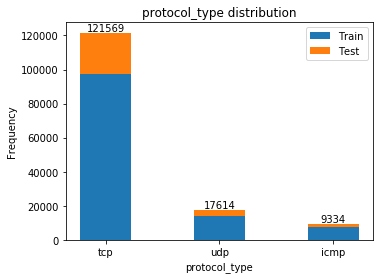

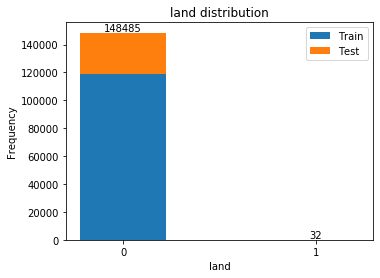

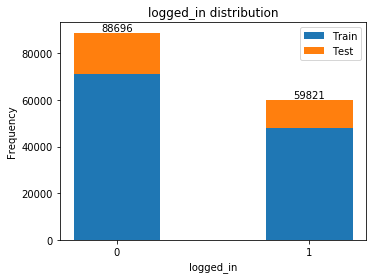

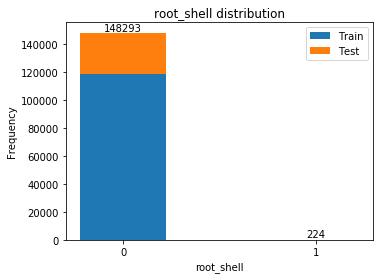

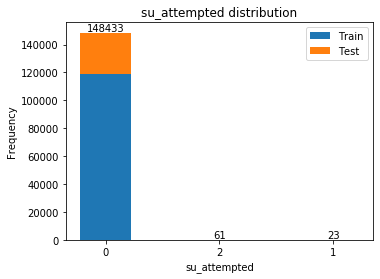

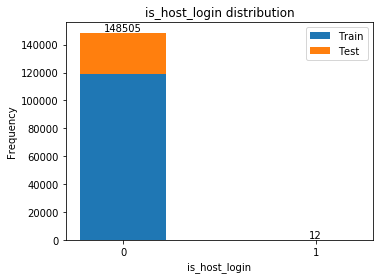

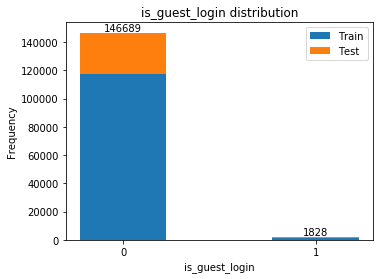

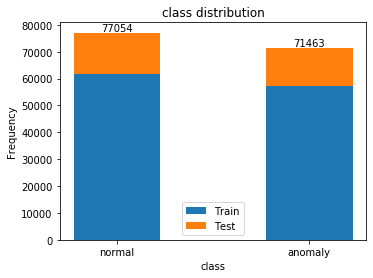

In [0]:
import numpy as np
import matplotlib.pyplot as plt


for c in train.select_dtypes(include='object').columns:

  if c not in ['service','flag']:
    LABELS = pd.value_counts(train[c]).index.values

    N = len(LABELS)
    ind = np.arange(N)    # the x locations for the groups
    width = 0.45       # the width of the bars: can also be len(x) sequence

    plt.figure(figsize=(5.5, 4))

    p1 = plt.bar(ind, pd.value_counts(train[c]), width)
    p2 = plt.bar(ind, pd.value_counts(test[c]), width,
                bottom=pd.value_counts(train[c]))

    plt.legend([p1,p2],["Train", "Test"])
    plt.xlabel(c)
    plt.ylabel("Frequency")
    plt.title(c + ' distribution')
    plt.xticks(range(N), LABELS)

    for r1,r2 in zip(p1,p2):
        h1 = r1.get_height()
        h2 = r2.get_height()
        plt.text(r1.get_x()+r1.get_width()/2., h1+h2, '%s'% (h1+h2), ha = 'center', va='bottom')

    plt.show()

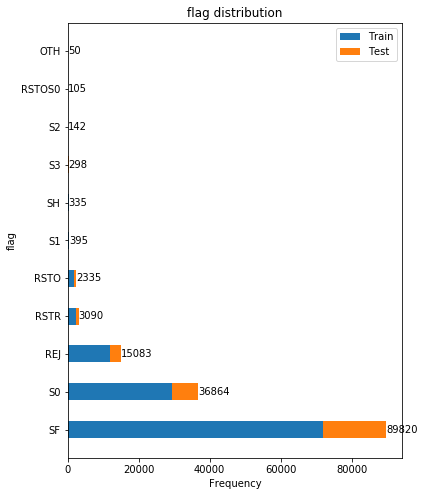

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# ['flag','service]:

c = 'flag'
plt.figure(figsize=(6, 8))

LABELS = pd.value_counts(train[c]).index.values

N = len(LABELS)
ind = np.arange(N)    # the x locations for the groups
width = 0.45       # the width of the bars: can also be len(x) sequence

p1 = plt.barh(ind, pd.value_counts(train[c]), width)
p2 = plt.barh(ind, pd.value_counts(test[c]), width,
            left=pd.value_counts(train[c]))

plt.legend([p1,p2],["Train", "Test"])
plt.ylabel(c)
plt.xlabel("Frequency")
plt.title(c + ' distribution')
plt.yticks(range(N), LABELS)

for r1,r2 in zip(p1,p2):
    h1 = r1.get_width()
    h2 = r2.get_width()
    plt.text(h1+h2, r1.get_y()+r1.get_height()/2., '%s'% (h1+h2), ha = 'left', va='center')

plt.show()

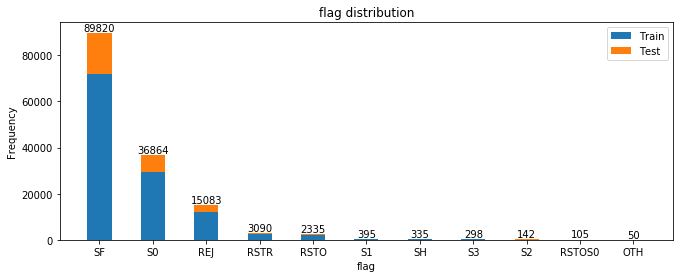

In [0]:
import numpy as np
import matplotlib.pyplot as plt

c = 'flag'
LABELS = pd.value_counts(train[c]).index.values

N = len(LABELS)
ind = np.arange(N)    # the x locations for the groups
width = 0.45       # the width of the bars: can also be len(x) sequence

plt.figure(figsize=(11, 4))

p1 = plt.bar(ind, pd.value_counts(train[c]), width)
p2 = plt.bar(ind, pd.value_counts(test[c]), width,
            bottom=pd.value_counts(train[c]))

plt.legend([p1,p2],["Train", "Test"])
plt.xlabel(c)
plt.ylabel("Frequency")
plt.title(c + ' distribution')
plt.xticks(range(N), LABELS)

for r1,r2 in zip(p1,p2):
    h1 = r1.get_height()
    h2 = r2.get_height()
    plt.text(r1.get_x()+r1.get_width()/2., h1+h2, '%s'% (h1+h2), ha = 'center', va='bottom')

plt.show()

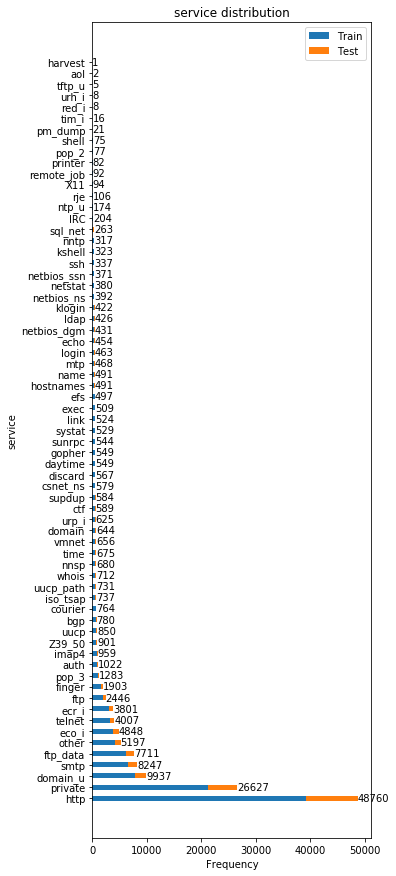

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# ['flag','service]:

c = 'service'
plt.figure(figsize=(5, 15))
width = 0.45

train_vals = pd.value_counts(train[c])
test_vals  = pd.value_counts(test[c])

for v in train_vals.index.values:
  if v not in test_vals.index.values:
    test_vals[v] = 0

for v in test_vals.index.values:
  if v not in train_vals.index.values:
    train_vals[v] = 0


LABELS = train_vals.index.values

N = len(LABELS)
ind = np.arange(N)    # the x locations for the groups
width = 0.45       # the width of the bars: can also be len(x) sequence

p1 = plt.barh(ind, train_vals, width)
p2 = plt.barh(ind, test_vals, width, left=train_vals)

plt.legend([p1,p2],["Train", "Test"])
plt.ylabel(c)
plt.xlabel("Frequency")
plt.title(c + ' distribution')
plt.yticks(range(N), LABELS)

for r1,r2 in zip(p1,p2):
    h1 = r1.get_width()
    h2 = r2.get_width()
    plt.text(h1+h2, r1.get_y()+r1.get_height()/2., '%s'% (h1+h2), ha = 'left', va='center')

plt.show()

## Normalize All (for analysis)

In [0]:
numeric_cols = merged_df.select_dtypes(include='float64').columns

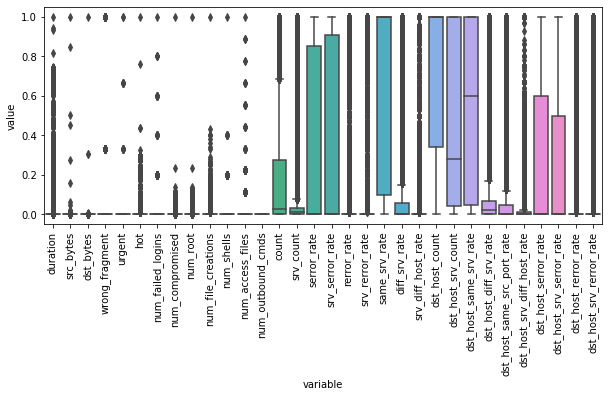

In [0]:
import numpy as np; np.random.seed(42)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

normalized_df = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(merged_df[numeric_cols]))

plt.figure(figsize=(10, 4))

df = normalized_df

sns.boxplot(x="variable", y="value", data=pd.melt(df))

index = np.arange(len(numeric_cols))
plt.xticks(index, numeric_cols, rotation=90)
plt.show()

## Correlations


### Transform data for correlation analysis

In [0]:
print("TRANSFORMATIONS:\n")

for c in merged_df.select_dtypes(include='object'):
  # change object columns to categorical
  merged_df[c] = pd.Categorical(merged_df[c])

  with pd.option_context("display.max_rows", 1000):
    print(pd.DataFrame(merged_df[c].cat.categories.values, columns=[c]))
    print('\n')

  # substitute categories with integer values
  merged_df[c] = merged_df[c].cat.codes

#categorical_df

TRANSFORMATIONS:

  protocol_type
0          icmp
1           tcp
2           udp


        service
0           IRC
1           X11
2        Z39_50
3           aol
4          auth
5           bgp
6       courier
7      csnet_ns
8           ctf
9       daytime
10      discard
11       domain
12     domain_u
13         echo
14        eco_i
15        ecr_i
16          efs
17         exec
18       finger
19          ftp
20     ftp_data
21       gopher
22      harvest
23    hostnames
24         http
25        imap4
26     iso_tsap
27       klogin
28       kshell
29         ldap
30         link
31        login
32          mtp
33         name
34  netbios_dgm
35   netbios_ns
36  netbios_ssn
37      netstat
38         nnsp
39         nntp
40        ntp_u
41        other
42      pm_dump
43        pop_2
44        pop_3
45      printer
46      private
47        red_i
48   remote_job
49          rje
50        shell
51         smtp
52      sql_net
53          ssh
54       sunrpc
55       supdup
56  

In [0]:
# exclude null values
corr_df = merged_df[merged_df.columns.difference(["num_outbound_cmds","train"])]

### Correlation Matrix

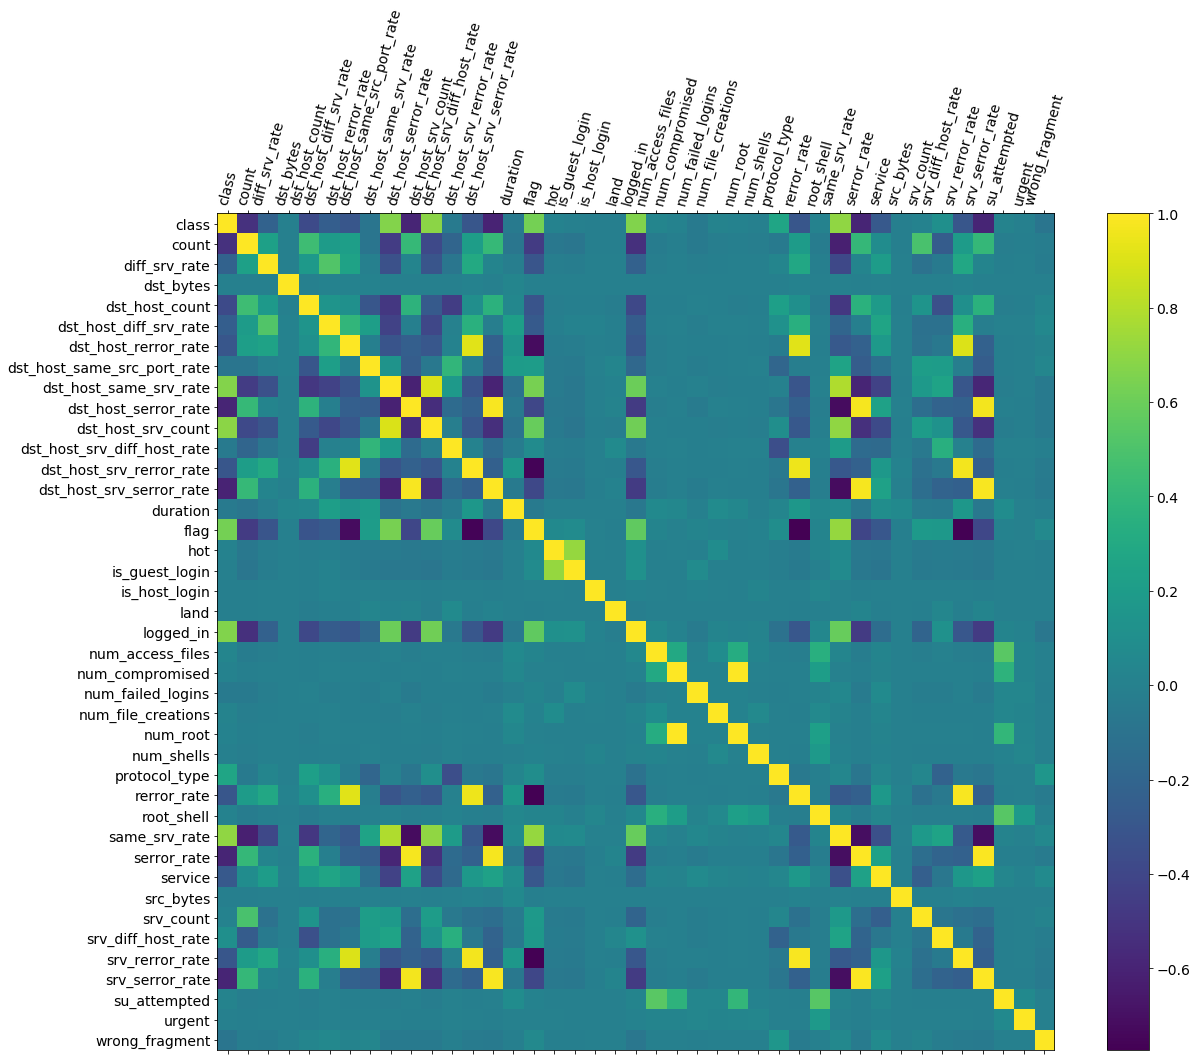

In [0]:
f = plt.figure(figsize=(19, 15))
plt.matshow(corr_df.corr(), fignum=f.number)
plt.xticks(range(corr_df.shape[1]), corr_df.columns, fontsize=14, rotation=75)
plt.yticks(range(corr_df.shape[1]), corr_df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
# plt.title('Correlation Matrix', fontsize=16);

In [0]:
import pandas as pd
import numpy as np

rs = np.random.RandomState(0)
corr = corr_df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

## Cleanup

In [0]:
del train
del test
del normalized_df
del merged_df
del corr_df

# Data Transformation


## Load Train/Test (with numeric categories)

In [0]:
import pandas as pd

# load dataset
train = pd.read_pickle('/content/drive/My Drive/Colab Notebooks/train.pkl')
test  = pd.read_pickle('/content/drive/My Drive/Colab Notebooks/test.pkl')

In [0]:
train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
41282,0.0,icmp,ecr_i,SF,1032.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,208.0,208.0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255.0,208.0,0.82,0.01,0.82,0.00,0.00,0.0,0.00,0.0,anomaly
117612,0.0,tcp,http,SF,210.0,574.0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,14.0,14.0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,normal
116052,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,137.0,11.0,1.0,1.0,0.0,0.0,0.08,0.06,0.00,255.0,6.0,0.02,0.08,0.00,0.00,1.00,1.0,0.00,0.0,anomaly
32840,0.0,tcp,gopher,S0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,254.0,2.0,1.0,1.0,0.0,0.0,0.01,0.06,0.00,255.0,19.0,0.07,0.08,0.00,0.00,1.00,1.0,0.00,0.0,anomaly
45594,0.0,tcp,http,SF,286.0,20424.0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,1.0,3.0,0.0,0.0,0.0,0.0,1.00,0.00,0.67,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128747,0.0,tcp,private,OTH,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,1.0,1.0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,168.0,1.0,0.01,0.71,0.71,0.00,0.04,0.0,0.62,0.0,anomaly
130050,18.0,tcp,smtp,SF,834.0,328.0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,1.0,2.0,0.0,0.0,0.0,0.0,1.00,0.00,1.00,100.0,45.0,0.45,0.03,0.01,0.00,0.00,0.0,0.00,0.0,normal
107990,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,135.0,15.0,1.0,1.0,0.0,0.0,0.11,0.07,0.00,255.0,35.0,0.14,0.05,0.00,0.00,1.00,1.0,0.00,0.0,anomaly
72191,0.0,tcp,http,SF,265.0,3608.0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,5.0,5.0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,11.0,255.0,1.00,0.00,0.09,0.04,0.00,0.0,0.00,0.0,normal


In [0]:
test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
48876,3.0,udp,private,SF,105.0,146.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,2.0,2.0,0.00,0.0,0.00,0.0,1.00,0.00,0.0,255.0,247.0,0.97,0.01,0.02,0.00,0.00,0.00,0.00,0.00,normal
9500,0.0,tcp,imap4,RSTO,0.0,44.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,2.0,1.0,0.00,0.0,1.00,1.0,0.50,1.00,0.0,255.0,49.0,0.19,0.03,0.00,0.00,0.00,0.00,0.70,0.98,anomaly
29486,0.0,tcp,http,S0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,245.0,21.0,1.00,1.0,0.00,0.0,0.09,0.05,0.0,255.0,21.0,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
73126,0.0,icmp,urp_i,SF,182.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,2.0,1.0,0.00,0.0,0.00,0.0,0.50,1.00,0.0,255.0,23.0,0.09,0.01,0.11,0.00,0.00,0.00,0.00,0.00,normal
35920,0.0,tcp,http,SF,291.0,6895.0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,4.0,4.0,0.00,0.0,0.00,0.0,1.00,0.00,0.0,4.0,255.0,1.00,0.00,0.25,0.01,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33152,5.0,tcp,smtp,SF,911.0,357.0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,2.0,1.0,0.00,0.0,0.00,0.0,0.50,1.00,0.0,90.0,51.0,0.57,0.06,0.01,0.00,0.00,0.00,0.00,0.00,normal
40655,0.0,tcp,http,SF,242.0,11675.0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,1.0,1.0,0.00,0.0,0.00,0.0,1.00,0.00,0.0,44.0,255.0,1.00,0.00,0.02,0.02,0.02,0.00,0.00,0.00,normal
12528,0.0,tcp,other,REJ,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,458.0,1.0,0.13,0.0,0.87,1.0,0.00,1.00,0.0,255.0,1.0,0.00,0.91,0.00,0.00,0.11,0.00,0.89,1.00,anomaly
119976,0.0,tcp,http,SF,217.0,424.0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,7.0,7.0,0.00,0.0,0.00,0.0,1.00,0.00,0.0,26.0,255.0,1.00,0.00,0.04,0.05,0.00,0.00,0.00,0.00,normal


## Normalization


In [0]:
categorical_cols = ['protocol_type',
'service',
'flag',
'land',
'logged_in',
'root_shell',
'su_attempted',
'is_host_login',
'is_guest_login',
'class']

numeric_cols = train.columns.difference(categorical_cols)

In [0]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()

train[numeric_cols] = scaler.fit_transform(train[numeric_cols])

train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
41282,0.000000,icmp,ecr_i,SF,7.478457e-07,0.000000e+00,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.407045,0.407045,0.0,0.0,0.0,0.0,1.00,0.00,0.00,1.000000,0.815686,0.82,0.01,0.82,0.00,0.00,0.0,0.00,0.0,anomaly
117612,0.000000,tcp,http,SF,1.521779e-07,4.381889e-07,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.027397,0.027397,0.0,0.0,0.0,0.0,1.00,0.00,0.00,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,normal
116052,0.000000,tcp,private,S0,0.000000e+00,0.000000e+00,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.268102,0.021526,1.0,1.0,0.0,0.0,0.08,0.06,0.00,1.000000,0.023529,0.02,0.08,0.00,0.00,1.00,1.0,0.00,0.0,anomaly
32840,0.000000,tcp,gopher,S0,0.000000e+00,0.000000e+00,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.497065,0.003914,1.0,1.0,0.0,0.0,0.01,0.06,0.00,1.000000,0.074510,0.07,0.08,0.00,0.00,1.00,1.0,0.00,0.0,anomaly
45594,0.000000,tcp,http,SF,2.072518e-07,1.559158e-05,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.001957,0.005871,0.0,0.0,0.0,0.0,1.00,0.00,0.67,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128747,0.000000,tcp,private,OTH,0.000000e+00,0.000000e+00,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.001957,0.001957,0.0,0.0,0.0,0.0,1.00,0.00,0.00,0.658824,0.003922,0.01,0.71,0.71,0.00,0.04,0.0,0.62,0.0,anomaly
130050,0.000331,tcp,smtp,SF,6.043636e-07,2.503936e-07,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.001957,0.003914,0.0,0.0,0.0,0.0,1.00,0.00,1.00,0.392157,0.176471,0.45,0.03,0.01,0.00,0.00,0.0,0.00,0.0,normal
107990,0.000000,tcp,private,S0,0.000000e+00,0.000000e+00,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.264188,0.029354,1.0,1.0,0.0,0.0,0.11,0.07,0.00,1.000000,0.137255,0.14,0.05,0.00,0.00,1.00,1.0,0.00,0.0,anomaly
72191,0.000000,tcp,http,SF,1.920340e-07,2.754330e-06,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.009785,0.009785,0.0,0.0,0.0,0.0,1.00,0.00,0.00,0.043137,1.000000,1.00,0.00,0.09,0.04,0.00,0.0,0.00,0.0,normal


In [0]:
test[numeric_cols] = scaler.transform(test[numeric_cols])

test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
48876,0.000055,udp,private,SF,7.608895e-08,1.114557e-07,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.003914,0.003914,0.00,0.0,0.00,0.0,1.00,0.00,0.0,1.000000,0.968627,0.97,0.01,0.02,0.00,0.00,0.00,0.00,0.00,normal
9500,0.000000,tcp,imap4,RSTO,0.000000e+00,3.358939e-08,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.003914,0.001957,0.00,0.0,1.00,1.0,0.50,1.00,0.0,1.000000,0.192157,0.19,0.03,0.00,0.00,0.00,0.00,0.70,0.98,anomaly
29486,0.000000,tcp,http,S0,0.000000e+00,0.000000e+00,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.479452,0.041096,1.00,1.0,0.00,0.0,0.09,0.05,0.0,1.000000,0.082353,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
73126,0.000000,icmp,urp_i,SF,1.318875e-07,0.000000e+00,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.003914,0.001957,0.00,0.0,0.00,0.0,0.50,1.00,0.0,1.000000,0.090196,0.09,0.01,0.11,0.00,0.00,0.00,0.00,0.00,normal
35920,0.000000,tcp,http,SF,2.108751e-07,5.263610e-06,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.007828,0.007828,0.00,0.0,0.00,0.0,1.00,0.00,0.0,0.015686,1.000000,1.00,0.00,0.25,0.01,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33152,0.000092,tcp,smtp,SF,6.601622e-07,2.725321e-07,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.003914,0.001957,0.00,0.0,0.00,0.0,0.50,1.00,0.0,0.352941,0.200000,0.57,0.06,0.01,0.00,0.00,0.00,0.00,0.00,normal
40655,0.000000,tcp,http,SF,1.753669e-07,8.912640e-06,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.001957,0.001957,0.00,0.0,0.00,0.0,1.00,0.00,0.0,0.172549,1.000000,1.00,0.00,0.02,0.02,0.02,0.00,0.00,0.00,normal
12528,0.000000,tcp,other,REJ,0.000000e+00,0.000000e+00,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.896282,0.001957,0.13,0.0,0.87,1.0,0.00,1.00,0.0,1.000000,0.003922,0.00,0.91,0.00,0.00,0.11,0.00,0.89,1.00,anomaly
119976,0.000000,tcp,http,SF,1.572505e-07,3.236796e-07,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.013699,0.013699,0.00,0.0,0.00,0.0,1.00,0.00,0.0,0.101961,1.000000,1.00,0.00,0.04,0.05,0.00,0.00,0.00,0.00,normal


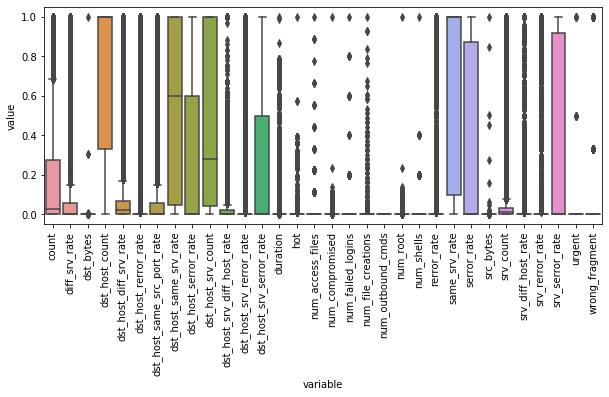

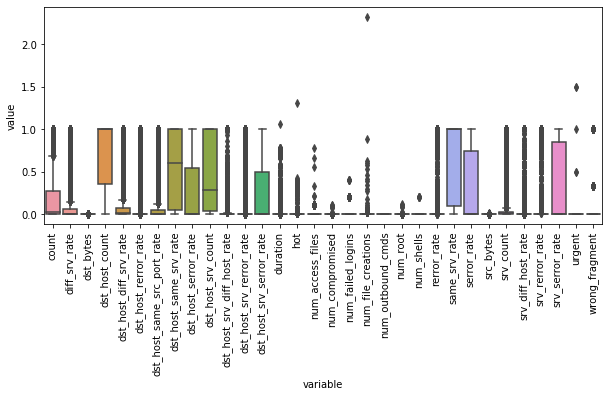

In [0]:
import numpy as np; np.random.seed(42)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))

df = train[numeric_cols]

sns.boxplot(x="variable", y="value", data=pd.melt(df))

index = np.arange(len(df.columns))
plt.xticks(index, df.columns, rotation=90)
plt.show()

#---------#

plt.figure(figsize=(10, 4))

df = test[numeric_cols]

sns.boxplot(x="variable", y="value", data=pd.melt(df))

index = np.arange(len(df.columns))
plt.xticks(index, df.columns, rotation=90)
plt.show()

## One-Hot Encoding

In [0]:
train2 = train
train2['train'] = 1

test2 = test
test2['train'] = 0


merged_df = pd.concat([train2, test2])
onehot_df = merged_df

# for each category create n columns with name "<category>_<value>"
for c in categorical_cols:
  if (len(merged_df[c].unique()) <= 2) and (c != 'class'):
    print("Skipping " + c + " as it is a binary column")

  else:
    print("Encoding " + c + " with one hot")
    onehot_df[c] = pd.Categorical(merged_df[c])
    dfDummies = pd.get_dummies(onehot_df[c], prefix = c)
    onehot_df = pd.concat([onehot_df, dfDummies], axis=1)

    del onehot_df[c]

print('One Hot encoded dataset:\n')
onehot_df

Encoding protocol_type with one hot
Encoding service with one hot
Encoding flag with one hot
Skipping land as it is a binary column
Skipping logged_in as it is a binary column
Skipping root_shell as it is a binary column
Encoding su_attempted with one hot
Skipping is_host_login as it is a binary column
Skipping is_guest_login as it is a binary column
Encoding class with one hot
One Hot encoded dataset:



,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,train,protocol_type_icmp,protocol_type_tcp,...,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,su_attempted_0,su_attempted_1,su_attempted_2,class_anomaly,class_normal
41282,0.000000,7.478457e-07,0.000000e+00,0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.407045,0.407045,0.00,0.0,0.00,0.0,1.00,0.00,0.00,1.000000,0.815686,0.82,0.01,0.82,0.00,0.00,0.00,0.00,0.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
117612,0.000000,1.521779e-07,4.381889e-07,0,0.0,0.0,0.0,0.0,1,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.027397,0.027397,0.00,0.0,0.00,0.0,1.00,0.00,0.00,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
116052,0.000000,0.000000e+00,0.000000e+00,0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.268102,0.021526,1.00,1.0,0.00,0.0,0.08,0.06,0.00,1.000000,0.023529,0.02,0.08,0.00,0.00,1.00,1.00,0.00,0.0,1,0,1,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
32840,0.000000,0.000000e+00,0.000000e+00,0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.497065,0.003914,1.00,1.0,0.00,0.0,0.01,0.06,0.00,1.000000,0.074510,0.07,0.08,0.00,0.00,1.00,1.00,0.00,0.0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
45594,0.000000,2.072518e-07,1.559158e-05,0,0.0,0.0,0.0,0.0,1,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.001957,0.005871,0.00,0.0,0.00,0.0,1.00,0.00,0.67,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33152,0.000092,6.601622e-07,2.725321e-07,0,0.0,0.0,0.0,0.0,1,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.003914,0.001957,0.00,0.0,0.00,0.0,0.50,1.00,0.00,0.352941,0.200000,0.57,0.06,0.01,0.00,0.00,0.00,0.00,0.0,0,0,1,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
40655,0.000000,1.753669e-07,8.912640e-06,0,0.0,0.0,0.0,0.0,1,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.001957,0.001957,0.00,0.0,0.00,0.0,1.00,0.00,0.00,0.172549,1.000000,1.00,0.00,0.02,0.02,0.02,0.00,0.00,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
12528,0.000000,0.000000e+00,0.000000e+00,0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.896282,0.001957,0.13,0.0,0.87,1.0,0.00,1.00,0.00,1.000000,0.003922,0.00,0.91,0.00,0.00,0.11,0.00,0.89,1.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
119976,0.000000,1.572505e-07,3.236796e-07,0,0.0,0.0,0.0,0.0,1,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.013699,0.013699,0.00,0.0,0.00,0.0,1.00,0.00,0.00,0.101961,1.000000,1.00,0.00,0.04,0.05,0.00,0.00,0.00,0.0,0,0,1,...,0,0,0,0,0,0,0,0,

## Save Treated Dataset

In [0]:
traindf = onehot_df.loc[onehot_df['train'] == 1]
testdf = onehot_df.loc[onehot_df['train'] == 0]

#train, test = train_test_split(original_df, test_size=0.2)
train = traindf.drop('train',axis=1)
test = testdf.drop('train',axis=1)

In [0]:
train

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,...,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,su_attempted_0,su_attempted_1,su_attempted_2,class_anomaly,class_normal
41282,0.000000,7.478457e-07,0.000000e+00,0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.407045,0.407045,0.0,0.0,0.0,0.0,1.00,0.00,0.00,1.000000,0.815686,0.82,0.01,0.82,0.00,0.00,0.0,0.00,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
117612,0.000000,1.521779e-07,4.381889e-07,0,0.0,0.0,0.0,0.0,1,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.027397,0.027397,0.0,0.0,0.0,0.0,1.00,0.00,0.00,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
116052,0.000000,0.000000e+00,0.000000e+00,0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.268102,0.021526,1.0,1.0,0.0,0.0,0.08,0.06,0.00,1.000000,0.023529,0.02,0.08,0.00,0.00,1.00,1.0,0.00,0.0,0,1,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
32840,0.000000,0.000000e+00,0.000000e+00,0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.497065,0.003914,1.0,1.0,0.0,0.0,0.01,0.06,0.00,1.000000,0.074510,0.07,0.08,0.00,0.00,1.00,1.0,0.00,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
45594,0.000000,2.072518e-07,1.559158e-05,0,0.0,0.0,0.0,0.0,1,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.001957,0.005871,0.0,0.0,0.0,0.0,1.00,0.00,0.67,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128747,0.000000,0.000000e+00,0.000000e+00,0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.001957,0.001957,0.0,0.0,0.0,0.0,1.00,0.00,0.00,0.658824,0.003922,0.01,0.71,0.71,0.00,0.04,0.0,0.62,0.0,0,1,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
130050,0.000331,6.043636e-07,2.503936e-07,0,0.0,0.0,0.0,0.0,1,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.001957,0.003914,0.0,0.0,0.0,0.0,1.00,0.00,1.00,0.392157,0.176471,0.45,0.03,0.01,0.00,0.00,0.0,0.00,0.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
107990,0.000000,0.000000e+00,0.000000e+00,0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.264188,0.029354,1.0,1.0,0.0,0.0,0.11,0.07,0.00,1.000000,0.137255,0.14,0.05,0.00,0.00,1.00,1.0,0.00,0.0,0,1,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
72191,0.000000,1.920340e-07,2.754330e-06,0,0.0,0.0,0.0,0.0,1,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.009785,0.009785,0.0,0.0,0.0,0.0,1.00,0.00,0.00,0.043137,1.000000,1.00,0.00,0.09,0.04,0.00,0.0,0.00,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [0]:
test

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,...,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,su_attempted_0,su_attempted_1,su_attempted_2,class_anomaly,class_normal
48876,0.000055,7.608895e-08,1.114557e-07,0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.003914,0.003914,0.00,0.0,0.00,0.0,1.00,0.00,0.0,1.000000,0.968627,0.97,0.01,0.02,0.00,0.00,0.00,0.00,0.00,0,0,1,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
9500,0.000000,0.000000e+00,3.358939e-08,0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.003914,0.001957,0.00,0.0,1.00,1.0,0.50,1.00,0.0,1.000000,0.192157,0.19,0.03,0.00,0.00,0.00,0.00,0.70,0.98,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
29486,0.000000,0.000000e+00,0.000000e+00,0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.479452,0.041096,1.00,1.0,0.00,0.0,0.09,0.05,0.0,1.000000,0.082353,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
73126,0.000000,1.318875e-07,0.000000e+00,0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.003914,0.001957,0.00,0.0,0.00,0.0,0.50,1.00,0.0,1.000000,0.090196,0.09,0.01,0.11,0.00,0.00,0.00,0.00,0.00,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
35920,0.000000,2.108751e-07,5.263610e-06,0,0.0,0.0,0.0,0.0,1,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.007828,0.007828,0.00,0.0,0.00,0.0,1.00,0.00,0.0,0.015686,1.000000,1.00,0.00,0.25,0.01,0.00,0.00,0.00,0.00,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33152,0.000092,6.601622e-07,2.725321e-07,0,0.0,0.0,0.0,0.0,1,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.003914,0.001957,0.00,0.0,0.00,0.0,0.50,1.00,0.0,0.352941,0.200000,0.57,0.06,0.01,0.00,0.00,0.00,0.00,0.00,0,1,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
40655,0.000000,1.753669e-07,8.912640e-06,0,0.0,0.0,0.0,0.0,1,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.001957,0.001957,0.00,0.0,0.00,0.0,1.00,0.00,0.0,0.172549,1.000000,1.00,0.00,0.02,0.02,0.02,0.00,0.00,0.00,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
12528,0.000000,0.000000e+00,0.000000e+00,0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.896282,0.001957,0.13,0.0,0.87,1.0,0.00,1.00,0.0,1.000000,0.003922,0.00,0.91,0.00,0.00,0.11,0.00,0.89,1.00,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
119976,0.000000,1.572505e-07,3.236796e-07,0,0.0,0.0,0.0,0.0,1,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.013699,0.013699,0.00,0.0,0.00,0.0,1.00,0.00,0.0,0.101961,1.000000,1.00,0.00,0.04,0.05,0.00,0.00,0.00,0.00,0,1,0,...,0,0,0,0

In [0]:
train.to_pickle('/content/drive/My Drive/Colab Notebooks/train_treated.pkl')
test.to_pickle('/content/drive/My Drive/Colab Notebooks/test_treated.pkl')

del onehot_df
del train
del test
del merged_df

# Feature Selection


In [0]:
import numpy as np
import matplotlib.pyplot as plt

#---------------------------------------
def plotRanking(ranked_importance, N_SELECTED):
  '''
  Plot the feature importance for the first N ranked features
  '''
  cols = ranked_importance["Column"][0:N_SELECTED]
  plt.figure(figsize=(N_SELECTED/4 * 1.618, 6))
  index = np.arange(len(cols))
  plt.bar(index, ranked_importance["Importance"][0:N_SELECTED], alpha=0.8)
  plt.xlabel('features')
  plt.ylabel('importance')
  plt.title('Feature importance')
  plt.xticks(index, cols, rotation=75)
  plt.tight_layout()
  plt.show()

## ExtraTree classifier

In [0]:
from sklearn.ensemble import ExtraTreesClassifier

#-----------------------------------------
def extraTreeRank(df, N_SELECTED):

  # divide target from dataset
  X = df[df.columns.difference(["class_anomaly", "class_normal"])]
  Y = df[["class_anomaly", "class_normal"]]

  # feature classification
  model = ExtraTreesClassifier(n_estimators=10)
  model.fit(X, Y)

  # build ranked list
  df2 = pd.DataFrame()
  df2["Column"] = df.columns.values.tolist()
  df2["Importance"] = pd.Series(model.feature_importances_)

  ranked_importance = df2.sort_values(by=['Importance'], ascending=False)

  # plot ranking
  plotRanking(ranked_importance, N_SELECTED)

  # select first N columns
  selected_cols = ranked_importance[0:N_SELECTED]["Column"].values

  # print selected dataset
  print("\nSelected Features:\n")
  print(selected_cols)

  return selected_cols

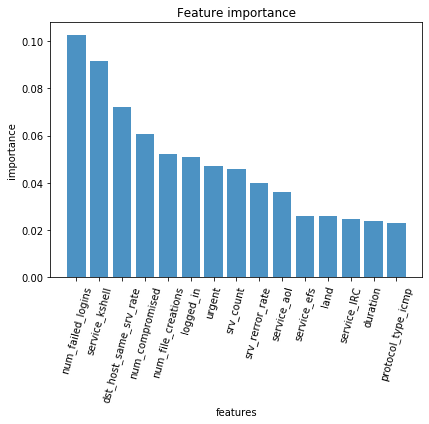


Selected Features:

['num_failed_logins' 'service_kshell' 'dst_host_same_srv_rate'
 'num_compromised' 'num_file_creations' 'logged_in' 'urgent' 'srv_count'
 'srv_rerror_rate' 'service_aol' 'service_efs' 'land' 'service_IRC'
 'duration' 'protocol_type_icmp']


array(['num_failed_logins', 'service_kshell', 'dst_host_same_srv_rate',
       'num_compromised', 'num_file_creations', 'logged_in', 'urgent',
       'srv_count', 'srv_rerror_rate', 'service_aol', 'service_efs',
       'land', 'service_IRC', 'duration', 'protocol_type_icmp'],
      dtype=object)

In [0]:
traindf = pd.read_pickle('/content/drive/My Drive/Colab Notebooks/train_treated.pkl')
extraTreeRank(traindf, 15)

## Univariate Selection

In [0]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

def univariateSel(df, N_SELECTED):
  # divide target from dataset
  X = df[df.columns.difference(["class_anomaly", "class_normal"])]
  Y = df[["class_anomaly", "class_normal"]]
  
  #apply SelectKBest class to extract top N best features
  bestfeatures = SelectKBest(score_func=chi2, k=N_SELECTED)
  fit = bestfeatures.fit(X,Y)
  dfscores = pd.DataFrame(fit.scores_)
  dfcolumns = pd.DataFrame(X.columns)

  #concat two dataframes for better visualization 
  featureScores = pd.concat([dfcolumns,dfscores],axis=1)
  featureScores.columns = ['Column','Importance']  #naming the dataframe columns

  plotRanking(featureScores.sort_values('Importance', ascending=0), N_SELECTED)

  print("\nSelected Features:\n")
  print(featureScores.nlargest(N_SELECTED,'Importance'))  #print 10 best features

  return featureScores.nlargest(N_SELECTED,'Importance').Column

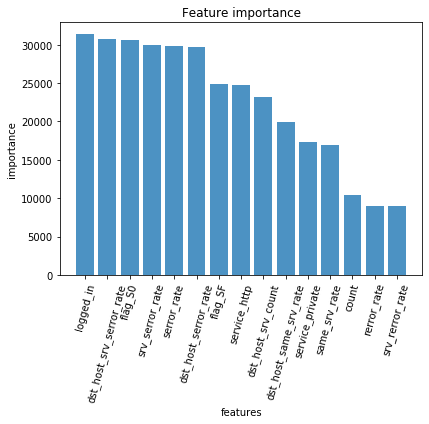


Selected Features:

                       Column    Importance
29                  logged_in  31343.655316
12   dst_host_srv_serror_rate  30812.018015
19                    flag_S0  30675.071195
115           srv_serror_rate  29968.930436
43                serror_rate  29862.536513
8        dst_host_serror_rate  29666.659809
23                    flag_SF  24888.217699
68               service_http  24806.029179
9          dst_host_srv_count  23169.859256
7      dst_host_same_srv_rate  19894.022211
90            service_private  17267.338536
42              same_srv_rate  16904.991539
0                       count  10468.942103
40                rerror_rate   8988.752337
114           srv_rerror_rate   8982.255358


29                    logged_in
12     dst_host_srv_serror_rate
19                      flag_S0
115             srv_serror_rate
43                  serror_rate
8          dst_host_serror_rate
23                      flag_SF
68                 service_http
9            dst_host_srv_count
7        dst_host_same_srv_rate
90              service_private
42                same_srv_rate
0                         count
40                  rerror_rate
114             srv_rerror_rate
Name: Column, dtype: object

In [0]:
traindf = pd.read_pickle('/content/drive/My Drive/Colab Notebooks/train_treated.pkl')
univariateSel(traindf, 15)

# Keras Functions

Functions used to build, evaluate and display the results of a given neural network.


## Training


In [0]:
## --------------------------------------------------------------
def saveModel(model, filename):
    """
    Save trained model and weights to a file for future analysis.
    """
    # save model
    model_json = model.to_json()
    with open("/content/drive/My Drive/Colab Notebooks/" + filename + ".json", "w+") as json_file:
        json_file.write(model_json)
        
    # save weights
    model.save_weights("/content/drive/My Drive/Colab Notebooks/" + filename + ".h5")
    print("Saved model " + filename + " to disk")

In [6]:
##---------------------------------------------------##
##    Keras Model: create, train and test the NN     ##
##---------------------------------------------------##
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

## --------------------------------------------------------------
def buildModel(train_X, train_Y, test_X, test_Y, N_SELECTED, NODES1, NODES2, EPOCHS=150, BATCH=10):
  print("\nBuilding model [%d %d] with %d features, epochs=%d batch_size=%d" % (NODES1, NODES2, N_SELECTED, EPOCHS, BATCH))

  # define the keras model
  model = Sequential()
  model.add(Dense(NODES1, input_dim=N_SELECTED, activation='relu'))
  if NODES2 > 0:
    model.add(Dense(NODES2, activation='tanh'))
  model.add(Dense(2, activation='softmax'))

  # compile the keras model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  # fit the keras model on the dataset
  history = model.fit(train_X, train_Y, epochs=EPOCHS, batch_size=BATCH, validation_split=0.15, verbose = 0)

  # save trained model
  saveModel(model, "model_" + str(NODES1) + "_" + str(NODES2) + "_" + str(N_SELECTED) + "feat")

  return model, history

Using TensorFlow backend.


### Training History


In [0]:
## --------------------------------------------------------------
def plotHistory(history):
  # list all data in history
  print(history.history.keys())
  # summarize history for accuracy
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'dev'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'dev'], loc='upper left')
  plt.show()

## Evaluation

In [0]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as  sns

## --------------------------------------------------------------
def predictAndEvaluate(model, test_X, test_Y):
    """
    Return confusion matrix between predictions and actual values.
    """

    # predict
    predictions = model.predict(test_X)

    # print confusion matrix
    y_test = (test_Y > 0.5)
    y_pred = (predictions > 0.5)
    matrix = metrics.confusion_matrix(test_Y.values.argmax(axis=1), y_pred.argmax(axis=1))
    matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

    #matrix = metrics.confusion_matrix(test_Y, y_pred)
    #matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
    
    matrix = pd.DataFrame(matrix)

    print(matrix)

## Run Model (divide target from variables, build model, evaluate model, print history)


In [0]:
import pandas as pd

## --------------------------------------------------------------
def runModel(train, test, selected_cols, NODES1, NODES2, epochs=150):
  train_X = train[selected_cols]
  train_Y = train[["class_anomaly","class_normal"]]

  test_X = test[selected_cols]
  test_Y = test[["class_anomaly","class_normal"]]

  # train
  model, history = buildModel(train_X, train_Y, test_X, test_Y, len(selected_cols), NODES1, NODES2, epochs)

  # evaluate
  plotHistory(history)

  print('\nEvaluation on Train Set\n')
  predictAndEvaluate(model, train_X, train_Y)
  print('\nEvaluation on Test Set\n')
  predictAndEvaluate(model, test_X, test_Y)


Building model [10 0] with 121 features, epochs=2 batch_size=10





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where








Saved model model_10_0_121feat to disk
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


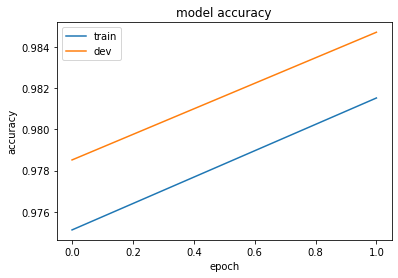

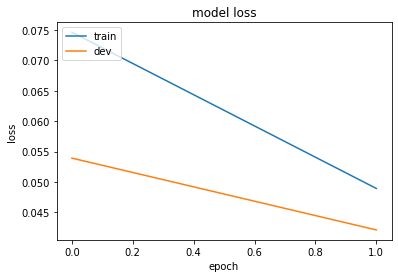


Evaluation on Train Set

          0         1
0  0.977230  0.022770
1  0.010187  0.989813

Evaluation on Test Set

          0         1
0  0.641160  0.358840
1  0.074246  0.925754


In [10]:
train = pd.read_pickle('/content/drive/My Drive/Colab Notebooks/third_try/train_treated.pkl')
test  = pd.read_pickle('/content/drive/My Drive/Colab Notebooks/third_try/test_treated.pkl')

runModel(train, test, train.columns[0:121], 10, 0, 2)

# Run Models

In [11]:
import random
import pandas as pd

random.seed(10)

# load dataset
train = pd.read_pickle('/content/drive/My Drive/Colab Notebooks/third_try/train_treated.pkl')
test  = pd.read_pickle('/content/drive/My Drive/Colab Notebooks/third_try/test_treated.pkl')

'class_normal' in train.columns[0:121]

False

In [12]:
'class_anomaly' in train.columns[0:121]

False

## All Features


Building model [10 0] with 121 features, epochs=150 batch_size=10
Saved model model_10_0_121feat to disk
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


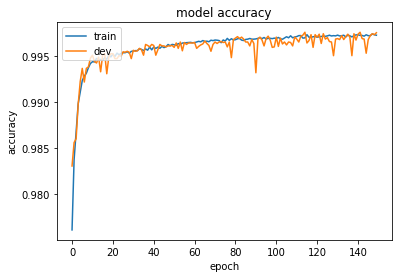

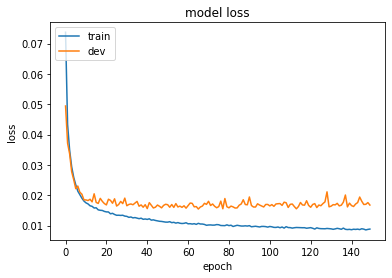


Evaluation on Train Set

          0         1
0  0.997100  0.002900
1  0.001916  0.998084

Evaluation on Test Set

          0         1
0  0.679186  0.320814
1  0.082072  0.917928

Building model [20 0] with 121 features, epochs=150 batch_size=10
Saved model model_20_0_121feat to disk
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


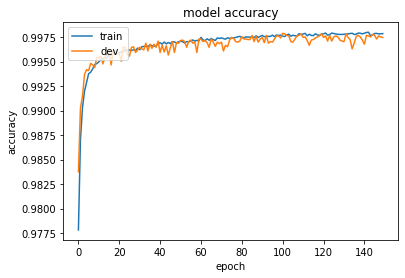

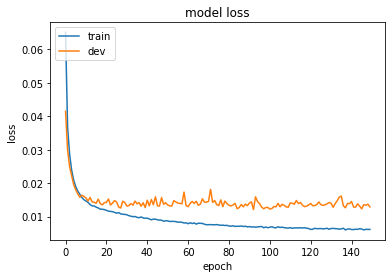


Evaluation on Train Set

          0         1
0  0.997902  0.002098
1  0.001856  0.998144

Evaluation on Test Set

          0         1
0  0.729214  0.270786
1  0.039955  0.960045

Building model [30 0] with 121 features, epochs=150 batch_size=10


In [0]:


# select
selected_cols = train.columns[0:121]

# run models
runModel(train, test, selected_cols, 10, 0)
runModel(train, test, selected_cols, 20, 0)
runModel(train, test, selected_cols, 30, 0)
runModel(train, test, selected_cols, 80, 0)

runModel(train, test, selected_cols, 80, 30)
runModel(train, test, selected_cols, 50, 10)

## Extra Tree Ranked Features

In [0]:
# select
selected_cols = extraTreeRank(train, 80)

# run models
runModel(train, test, selected_cols, 10, 0)
runModel(train, test, selected_cols, 30, 10)

# select
selected_cols = extraTreeRank(train, 40)

# run models
runModel(train, test, selected_cols, 10, 0)
runModel(train, test, selected_cols, 30, 10)

# select
selected_cols = extraTreeRank(train, 15)

# run models
runModel(train, test, selected_cols, 8, 0)
runModel(train, test, selected_cols, 4, 0)

## Univariate Selected Features

In [0]:
# select
selected_cols = univariateSel(train, 80)

# run models
runModel(train, test, selected_cols, 10, 0)
runModel(train, test, selected_cols, 30, 10)

# select
selected_cols = univariateSel(train, 40)

# run models
runModel(train, test, selected_cols, 10, 0)
runModel(train, test, selected_cols, 30, 10)

# select
selected_cols = univariateSel(train, 15)

# run models
runModel(train, test, selected_cols, 8, 0)
runModel(train, test, selected_cols, 4, 0)